In [1]:
import spyprot
import pandas as pd
from tqdm import tqdm
from datasets import Dataset, load_dataset

import matplotlib.pyplot as plt
import skimage.measure
from sklearn.manifold import TSNE
import seaborn as sns

/home/jovyan/my-conda-envs/transformers/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [32]:
MODEL = 'protbertBFD' # 'protbertBFD' or 'ESM'

## Preprocess dataset

datasets can be found here https://ucnmuni-my.sharepoint.com/:f:/g/personal/469217_muni_cz/EslQm6D3gbhAnc6t_jfPwwEB4HNCOnhkHpuentt8CLoY5A

In [33]:
if MODEL == 'protbertBFD':
    embeddings = pd.read_csv('../Alphafold_dataset/ProtBertBFD_train_embedding_af_v3.csv', index_col=0)
else:
    names = ['ID', 'label'] + [f'f{i}' for i in range(2560)]
    embeddings = pd.read_csv('../ESM/Knots_AF_ESM_train_embeddings_v3.csv', names=names)
dss = load_dataset('EvaKlimentova/knots_AF')
df_train = pd.DataFrame(dss['train'])
df_train = df_train.drop(columns=['uniprotSequence', 'label', 'latestVersion', 'globalMetricValue', 'uniprotStart', 'uniprotEnd', 'Length', 'Domain_architecture', 'InterPro', 'Max_Topology', 'Max Freq', 'Knot Core'])
df_train = pd.merge(df_train, embeddings, on="ID")
df_train

Using custom data configuration EvaKlimentova--knots_AF-293560de9ceccb3f
Found cached dataset parquet (/home/jovyan/.cache/huggingface/datasets/EvaKlimentova___parquet/EvaKlimentova--knots_AF-293560de9ceccb3f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

,ID,FamilyName,f0,f1,f2,f3,f4,f5,f6,f7,...,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,label
0,A0A7V9G3C1,VIT,0.026727,-0.032709,-0.027460,0.023039,0.018919,0.020549,0.009272,-0.005804,...,-0.043956,-0.042798,0.006104,-0.021828,-0.011685,-0.015414,-0.007688,-0.001579,0.015265,0
1,A0A382QPA6,AdoMet synthase,-0.006818,-0.011500,-0.000443,-0.002459,-0.000295,0.000784,-0.004652,0.005460,...,-0.016875,0.004226,0.005704,-0.005163,0.002065,0.001777,-0.001766,-0.006042,-0.001147,1
2,A0A1G9S6S9,VIT,0.014304,-0.017095,-0.003410,0.000148,0.022026,0.002258,0.015533,0.006351,...,-0.011653,-0.021954,-0.009635,0.029997,0.017102,-0.022601,-0.003827,-0.000879,0.005272,0
3,H9G6C9,SPOUT,0.005448,-0.001238,0.002784,0.006303,0.003013,0.010680,-0.014094,-0.006538,...,-0.008526,-0.009459,0.004119,-0.001539,-0.013712,0.012866,-0.001556,-0.006389,0.003397,1
4,S6B7J1,VIT,0.007396,0.012624,0.000298,0.007900,0.010098,0.012833,-0.004366,0.011860,...,-0.023012,-0.002771,0.008065,0.001363,-0.011313,-0.004297,-0.010823,-0.011609,0.002771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157639,A0A1F4T8D5,AdoMet synthase,-0.005064,-0.007969,0.000425,0.008406,0.006955,-0.000170,0.004755,0.014094,...,-0.023343,-0.000153,-0.005073,-0.016173,0.003977,0.001487,-0.006288,-0.011422,-0.002390,1
157640,A0A2A4LUL0,VIT,-0.001686,-0.002908,0.004665,-0.005091,0.006403,0.007291,0.006328,-0.000784,...,-0.019510,-0.010158,-0.004007,-0.006957,0.013491,-0.003094,0.017714,-0.012680,0.004062,0
157641,A0A1E3PN35,SPOUT,0.002880,-0.002980,0.002226,0.012888,0.005862,0.001760,0.000668,-0.000651,...,-0.019421,-0.005166,-0.000689,0.028695,-0.010394,0.004573,-0.002355,-0.010805,-0.002304,1
157642,A0A521E997,VIT,0.007995,0.007096,0.014262,0.005564,0.004309,-0.008297,0.008496,0.010894,...,-0.015333,-0.012375,0.002202,0.020472,0.015799,0.005555,0.002255,-0.000360,-0.009279,0


In [34]:
embeddings = df_train.drop(columns=['ID', 'FamilyName', 'label']).values
embeddings

array([[ 0.02672668, -0.03270894, -0.0274603 , ..., -0.00768768,
        -0.00157908,  0.01526531],
       [-0.00681822, -0.01149969, -0.00044311, ..., -0.00176633,
        -0.00604215, -0.00114659],
       [ 0.01430398, -0.01709533, -0.00340965, ..., -0.00382656,
        -0.00087854,  0.00527156],
       ...,
       [ 0.00287977, -0.00298046,  0.00222606, ..., -0.00235453,
        -0.01080516, -0.00230446],
       [ 0.0079952 ,  0.00709619,  0.0142618 , ...,  0.00225546,
        -0.00035978, -0.00927861],
       [ 0.01193863,  0.0043    ,  0.00158595, ..., -0.00129108,
        -0.00614984, -0.00143267]])

# T-sne visualization

In [35]:
tsne = TSNE(n_components=2, verbose=0, random_state=123)
z = tsne.fit_transform(embeddings)

### Color by label

In [48]:
df = pd.DataFrame()
df["y"] = df_train['label']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

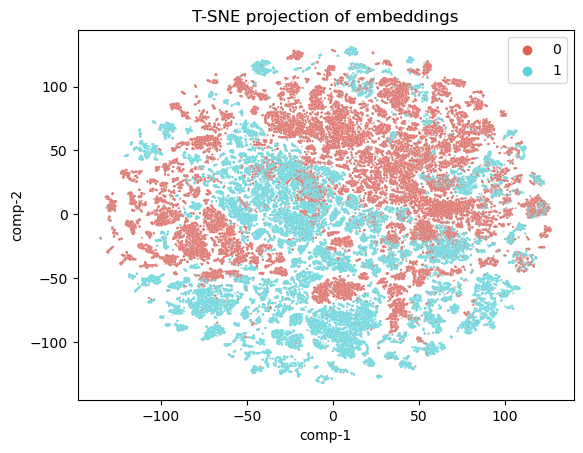

In [49]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, alpha=0.5, s=2).set(title="T-SNE projection of embeddings")
plt.savefig("train_tsne_" + MODEL + "_label.png", dpi=300) # svg for higher quality

### Color by family

In [36]:
df = pd.DataFrame()
df["y"] = df_train['FamilyName']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

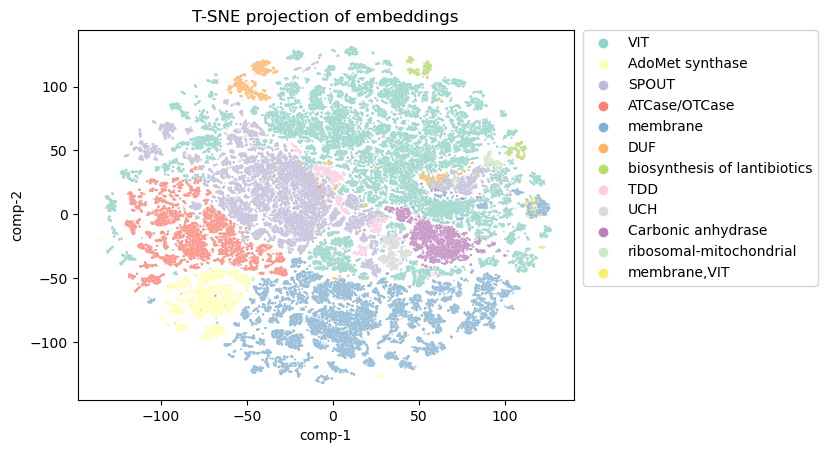

In [37]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("Set3"), 
                data=df, alpha=0.5, s=2).set(title="T-SNE projection of embeddings")
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("train_tsne_" + MODEL + "_family.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight') # svg for higher quality

# UMAP vizualization

In [38]:
import umap

In [39]:
reducer = umap.UMAP(random_state=42)

In [40]:
u = reducer.fit_transform(embeddings)

### Color by label

In [50]:
df = pd.DataFrame()
df["y"] = df_train['label']
df["comp-1"] = u[:,0]
df["comp-2"] = u[:,1]

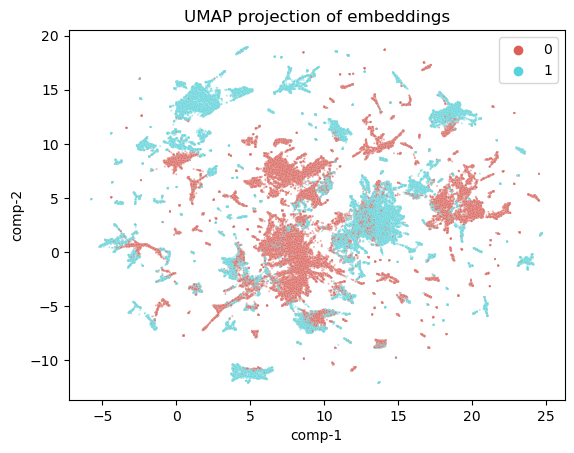

In [51]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, alpha=0.5, s=2).set(title="UMAP projection of embeddings")
plt.savefig("train_umap_" + MODEL + "_label.png", dpi=300) # svg for higher quality

### Color by family

In [41]:
df = pd.DataFrame()
df["y"] = df_train['FamilyName']
df["comp-1"] = u[:,0]
df["comp-2"] = u[:,1]

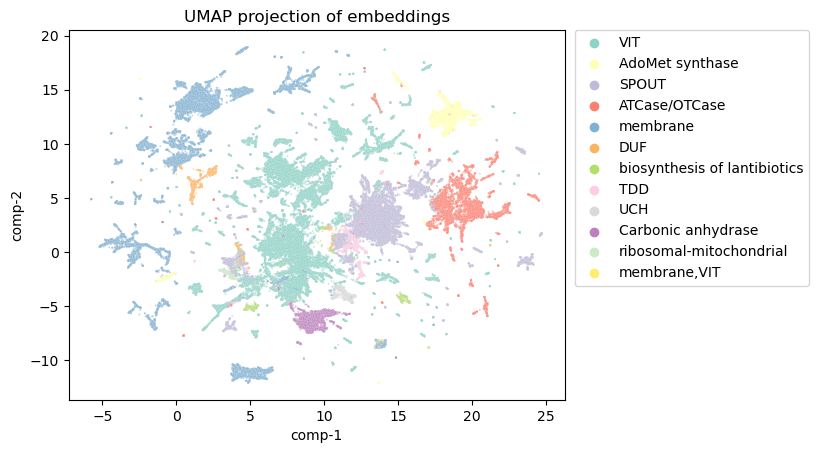

In [42]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("Set3"), 
                data=df, alpha=0.5, s=2).set(title="UMAP projection of embeddings")
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("train_umap_" + MODEL + "_family.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight') # svg for higher quality

# PCA visualization

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [44]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(embeddings)

In [45]:
pca = PCA(n_components=2, random_state=42)
p = pca.fit_transform(df_scaled)

### Color by label

In [52]:
df = pd.DataFrame()
df["y"] = df_train['label']
df["comp-1"] = p[:,0]
df["comp-2"] = p[:,1]

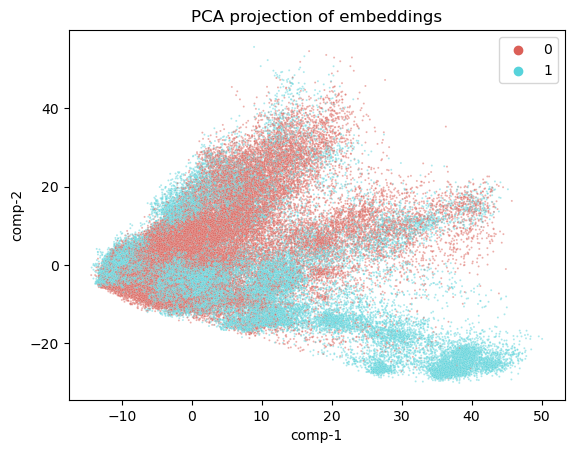

In [53]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, alpha=0.5, s=2).set(title="PCA projection of embeddings")
plt.savefig("train_pca_" + MODEL + "_label.png", dpi=300) # svg for higher quality

### Color by family

In [46]:
df = pd.DataFrame()
df["y"] = df_train['FamilyName']
df["comp-1"] = p[:,0]
df["comp-2"] = p[:,1]

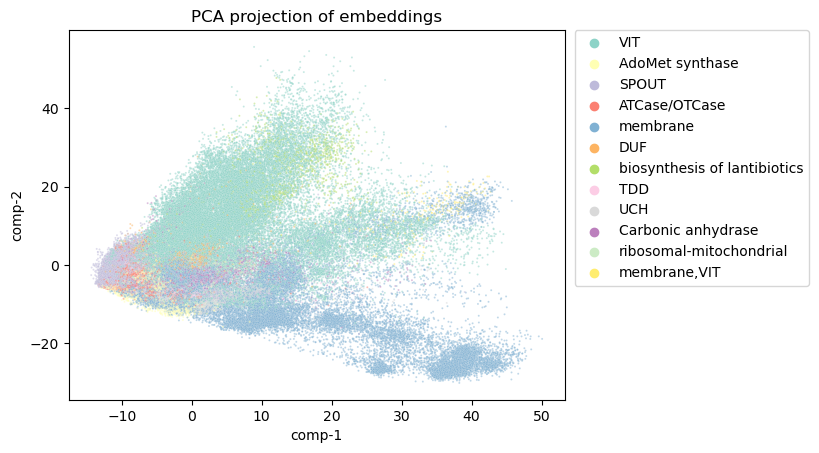

In [47]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("Set3"), 
                data=df, alpha=0.5, s=2).set(title="PCA projection of embeddings")
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("train_pca_" + MODEL + "_family.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight') # svg for higher quality